In [83]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Define the cryptocurrencies and their tickers
cryptos = {
    "Bitcoin (BTC)": "BTC-USD",
    "Ethereum (ETH)": "ETH-USD",
    "XRP (XRP)": "XRP-USD",
    "Binance Coin (BNB)": "BNB-USD",
    "Solana (SOL)": "SOL-USD"
}

# Define the date range
start_date = "2020-01-01"
end_date = "2023-12-31"

# Fetch historical data for each cryptocurrency
crypto_data = {}
for name, ticker in cryptos.items():
    print(f"Fetching data for {name}...")
    crypto_data[name] = yf.download(ticker, start=start_date, end=end_date)

Fetching data for Bitcoin (BTC)...
[*********************100%***********************]  1 of 1 completed
Fetching data for Ethereum (ETH)...
[*********************100%***********************]  1 of 1 completed
Fetching data for XRP (XRP)...
[*********************100%***********************]  1 of 1 completed
Fetching data for Binance Coin (BNB)...
[*********************100%***********************]  1 of 1 completed
Fetching data for Solana (SOL)...
[*********************100%***********************]  1 of 1 completed


In [91]:
# Define a consistent color dictionary for each cryptocurrency
crypto_colors = {
    "Bitcoin (BTC)": "#1f77b4",  # Blue
    "Ethereum (ETH)": "#ff7f0e",  # Orange
    "XRP (XRP)": "#2ca02c",  # Green
    "Binance Coin (BNB)": "#d62728",  # Red
    "Solana (SOL)": "#fd6c9e"  # Rose
}

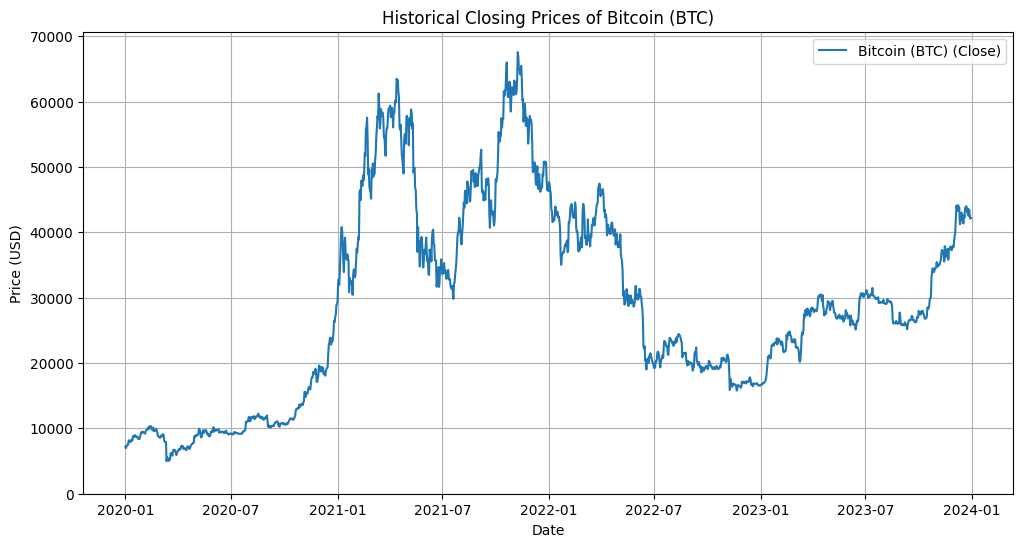

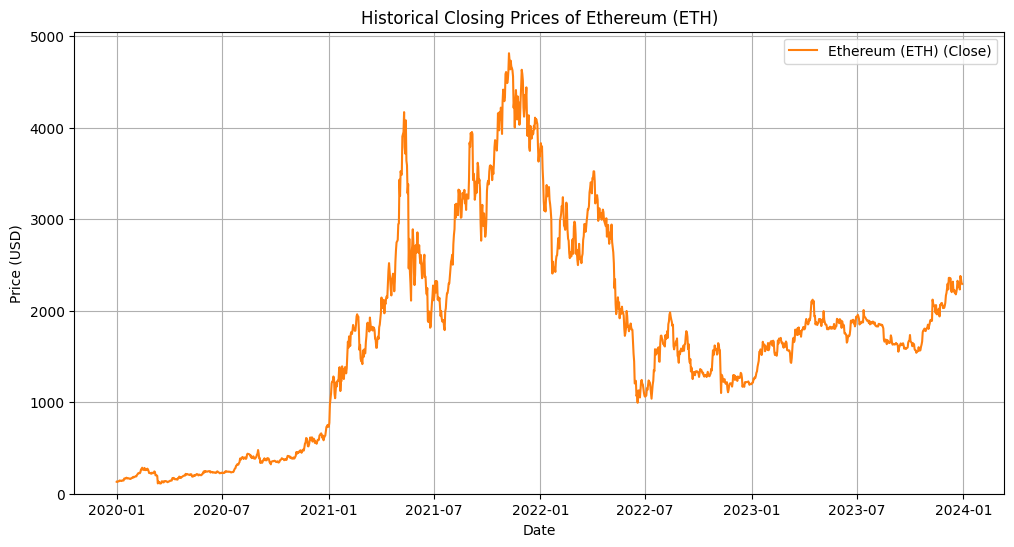

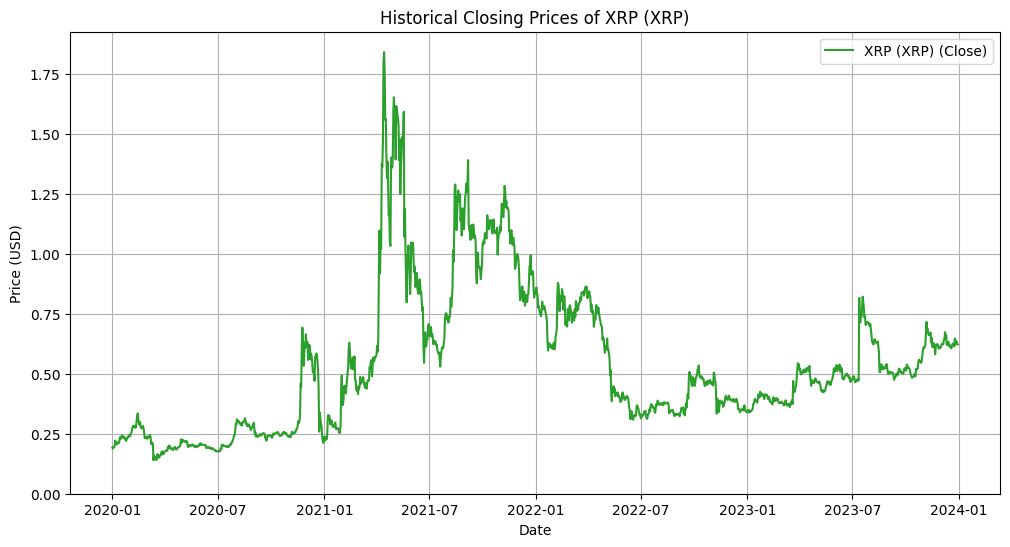

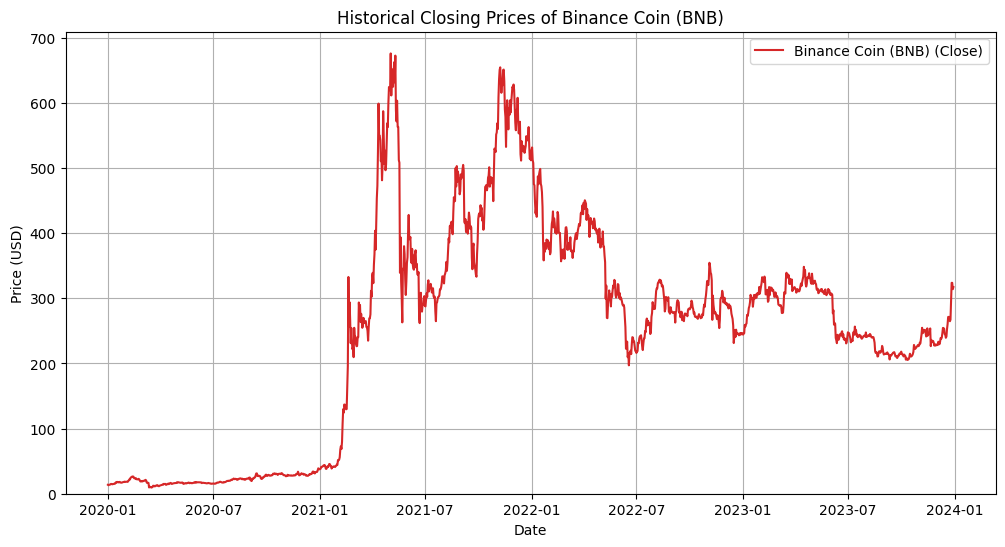

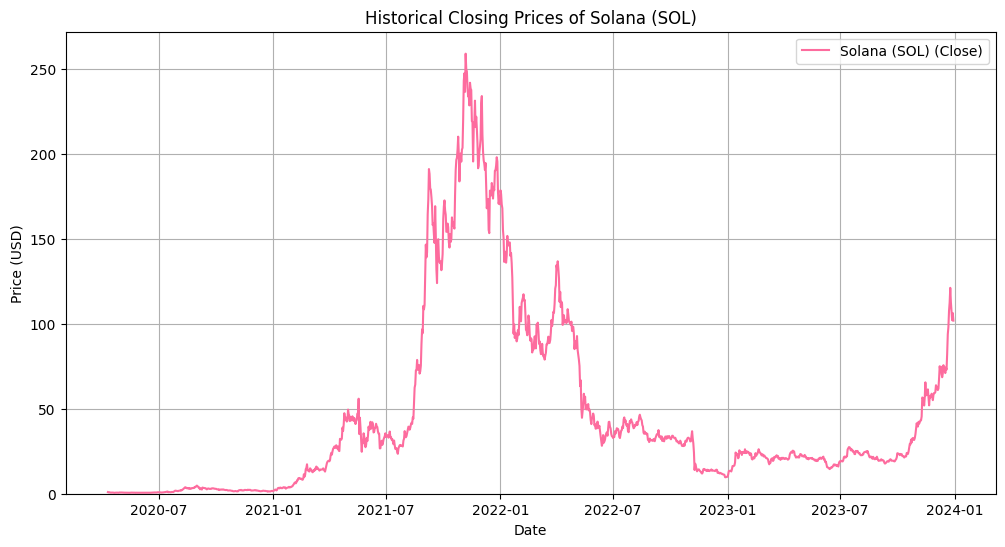

In [92]:
# Plot the historical closing prices for each cryptocurrency with consistent colors
for name, data in crypto_data.items():
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data["Close"], label=f"{name} (Close)", color=crypto_colors[name])
    plt.title(f"Historical Closing Prices of {name}")
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.ylim(bottom=0)  # Ensure the y-axis starts at 0
    plt.legend()
    plt.grid()
    plt.show()


In [5]:
# Function to calculate average daily return and volatility
def calculate_estimators(data):
    """
    Calculate the estimators of daily return (b) and daily volatility (sigma).

    Arguments:
    - data: DataFrame containing the 'Close' column (closing prices).

    Returns:
    - hat_b: Average daily return (mean of returns).
    - hat_sigma: Daily volatility (unbiased standard deviation of returns).
    """
    close_prices = data['Close'].values  # Extract closing prices
    returns = (close_prices[1:] - close_prices[:-1]) / close_prices[:-1]  # Daily returns

    # Estimate b (average daily return)
    hat_b = np.mean(returns)

    # Estimate sigma (unbiased daily volatility)
    hat_sigma = np.std(returns, ddof=1)  # ddof=1 for unbiased std dev

    return hat_b, hat_sigma

In [6]:
# Fetch historical data for each cryptocurrency
crypto_estimators = {}
for name, data in crypto_data.items():
    # Calculate estimators
    hat_b, hat_sigma = calculate_estimators(data)
    crypto_estimators[name] = {
        "Average Daily Return (b)": hat_b,
        "Daily Volatility (sigma)": hat_sigma
    }

# Display the results
for name, estimators in crypto_estimators.items():
    print(f"\n{name}:")
    print(f"  Average Daily Return (b): {estimators['Average Daily Return (b)']:.6f}")
    print(f"  Daily Volatility (sigma): {estimators['Daily Volatility (sigma)']:.6f}")



Bitcoin (BTC):
  Average Daily Return (b): 0.001832
  Daily Volatility (sigma): 0.034811

Ethereum (ETH):
  Average Daily Return (b): 0.003021
  Daily Volatility (sigma): 0.045435

XRP (XRP):
  Average Daily Return (b): 0.002512
  Daily Volatility (sigma): 0.060138

Binance Coin (BNB):
  Average Daily Return (b): 0.003411
  Daily Volatility (sigma): 0.050767

Solana (SOL):
  Average Daily Return (b): 0.006075
  Daily Volatility (sigma): 0.072966


In [7]:
# Function to simulate Brownian motion trajectories for a single cryptocurrency
def simulate_trajectories(initial_price, b, sigma, days, num_trajectories):
    """
    Simulate Brownian motion trajectories for a given cryptocurrency.

    Arguments:
    - initial_price: Starting price of the cryptocurrency (float).
    - b: Average daily return (float).
    - sigma: Daily volatility (float).
    - days: Number of days to simulate (int).
    - num_trajectories: Number of trajectories to simulate (int).

    Returns:
    - trajectories: A NumPy array of shape (num_trajectories, days) containing the simulated prices.
    """
    # Initialize the matrix for storing trajectories
    trajectories = np.zeros((num_trajectories, days))

    # Set the initial price for all trajectories
    trajectories[:, 0] = initial_price

    # Generate the trajectories
    for t in range(1, days):
        Z = np.random.normal(0, 1, num_trajectories)  # Random Gaussian noise
        trajectories[:, t] = trajectories[:, t-1] * (1 + b + sigma * Z)

    return trajectories

# Simulate trajectories for all cryptocurrencies
def simulate_all_cryptos(crypto_estimators, num_trajectories=5000, days=30):
    """
    Simulate Brownian motion trajectories for all cryptocurrencies.

    Arguments:
    - crypto_estimators: Dictionary containing estimators for each cryptocurrency.
    - num_trajectories: Number of trajectories to simulate (int).
    - days: Number of days to simulate (int).

    Returns:
    - all_trajectories: Dictionary with cryptocurrency names as keys and their trajectories as values.
    """
    all_trajectories = {}

    for name, estimators in crypto_estimators.items():
        initial_price = crypto_data[name]['Close'].iloc[-1]  # Last observed price
        b = estimators['Average Daily Return (b)']
        sigma = estimators['Daily Volatility (sigma)']

        print(f"Simulating trajectories for {name}...")
        trajectories = simulate_trajectories(initial_price, b, sigma, days, num_trajectories)
        all_trajectories[name] = trajectories

        # Plot a subset of trajectories for visualization
        plt.figure(figsize=(12, 6))
        for i in range(100):  # Plot 100 trajectories for clarity
            plt.plot(range(days), trajectories[i, :], alpha=0.2, color=crypto_colors[name])
        plt.title(f"Simulated Trajectories for {name} (Next {days} Days)")
        plt.xlabel("Days")
        plt.ylabel("Price (USD)")
        plt.grid()
        plt.show()

    return all_trajectories


Simulating trajectories for Bitcoin (BTC)...


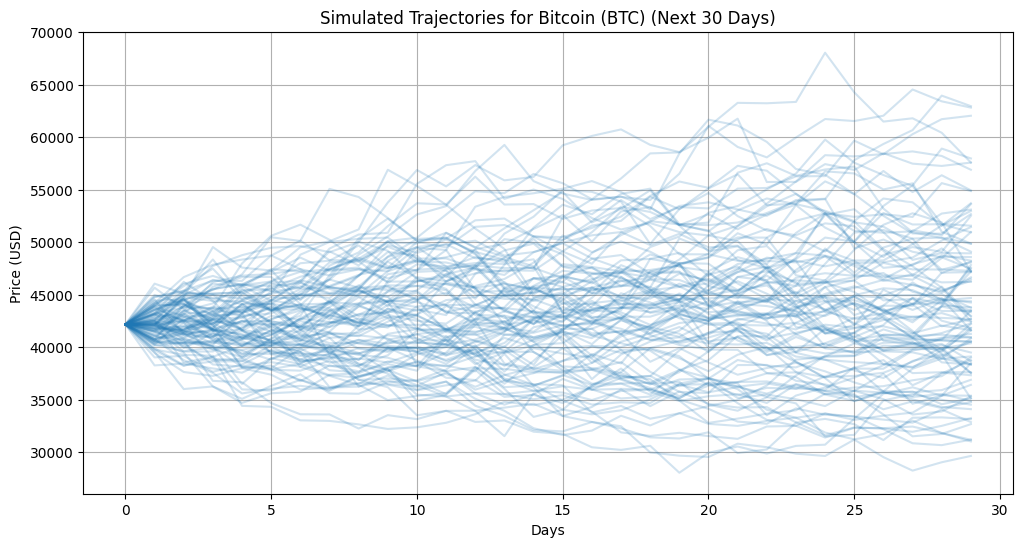

Simulating trajectories for Ethereum (ETH)...


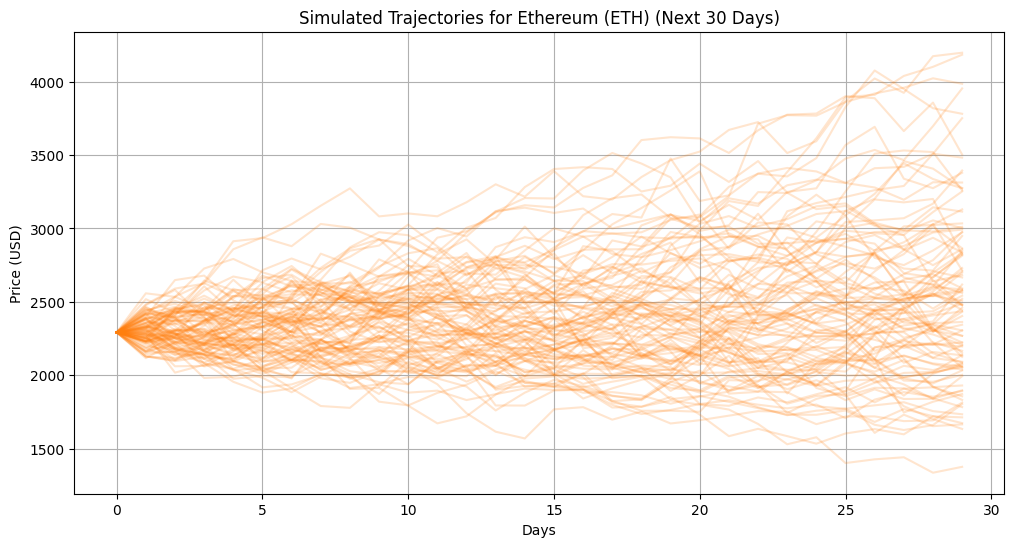

Simulating trajectories for XRP (XRP)...


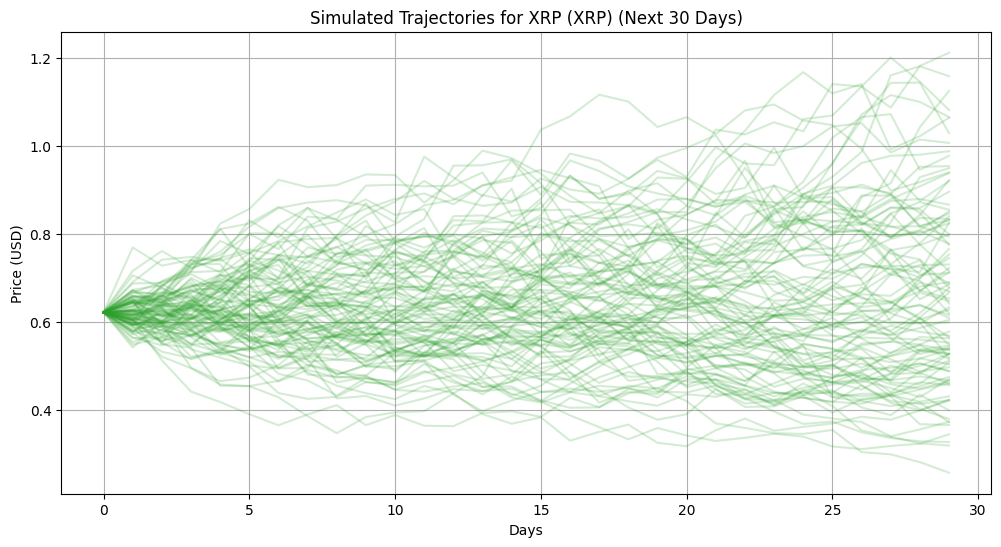

Simulating trajectories for Binance Coin (BNB)...


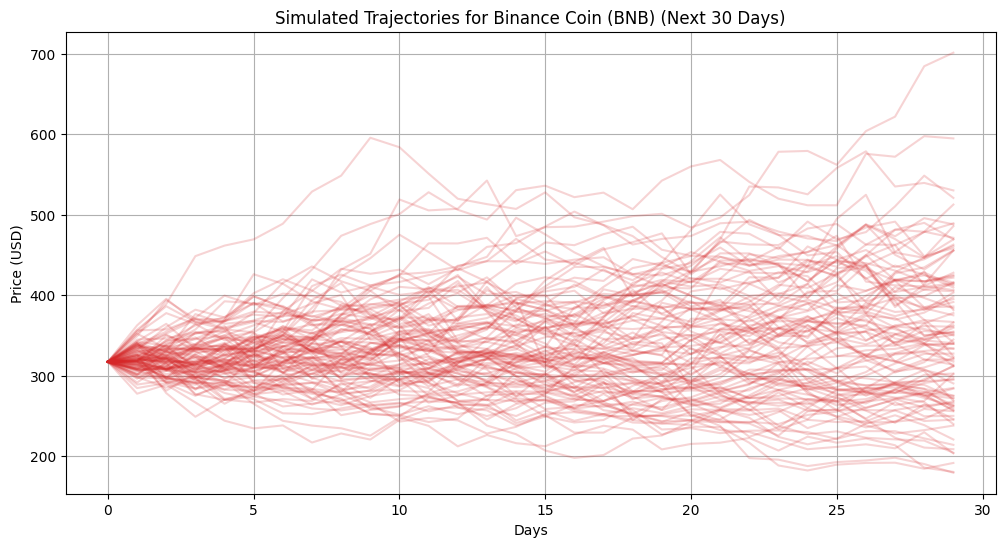

Simulating trajectories for Solana (SOL)...


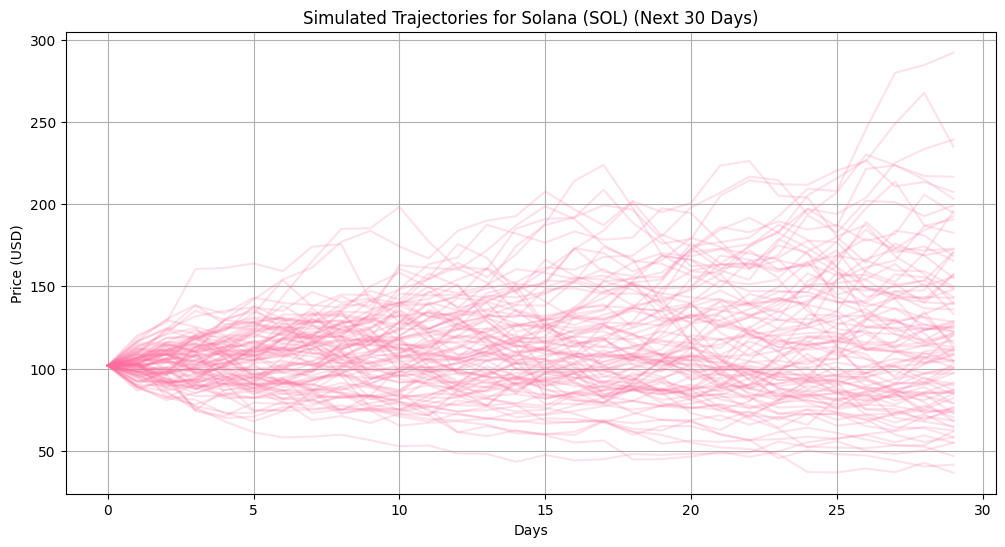

In [93]:
# Example usage
trajectories_by_crypto = simulate_all_cryptos(crypto_estimators, num_trajectories=5000, days=30)

In [9]:
# Function to calculate and plot metrics for simulated trajectories
def plot_trajectory_metrics(trajectories, crypto_name, crypto_colors=crypto_colors, days=30):
    """
    Calculate metrics and plot the mean trajectory with a confidence interval.

    Arguments:
    - trajectories: A NumPy array of shape (num_trajectories, days) containing simulated prices.
    - crypto_name: Name of the cryptocurrency (str).
    - crypto_colors: Dictionary mapping cryptocurrency names to their colors.
    - days: Number of days simulated (int).
    """
    # Calculate metrics
    traj_mean = np.mean(trajectories, axis=0)  # Mean trajectory
    traj_inf = np.percentile(trajectories, 2.5, axis=0)  # 2.5th percentile
    traj_sup = np.percentile(trajectories, 97.5, axis=0)  # 97.5th percentile

    # Create the plot
    plt.figure(figsize=(12, 8))

    # Plot the mean trajectory
    plt.plot(range(1, days + 1), traj_mean, label="Mean trajectory", color=crypto_colors[crypto_name], linewidth=2)

    # Plot the confidence interval
    plt.fill_between(range(1, days + 1), traj_inf, traj_sup, color=crypto_colors[crypto_name], alpha=0.2, label="95% confidence interval")

    # Configure the plot
    plt.title(f"Mean trajectory and 95% confidence interval for {crypto_name} ({days} days simulated)")
    plt.xlabel("Days")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid()
    plt.show()

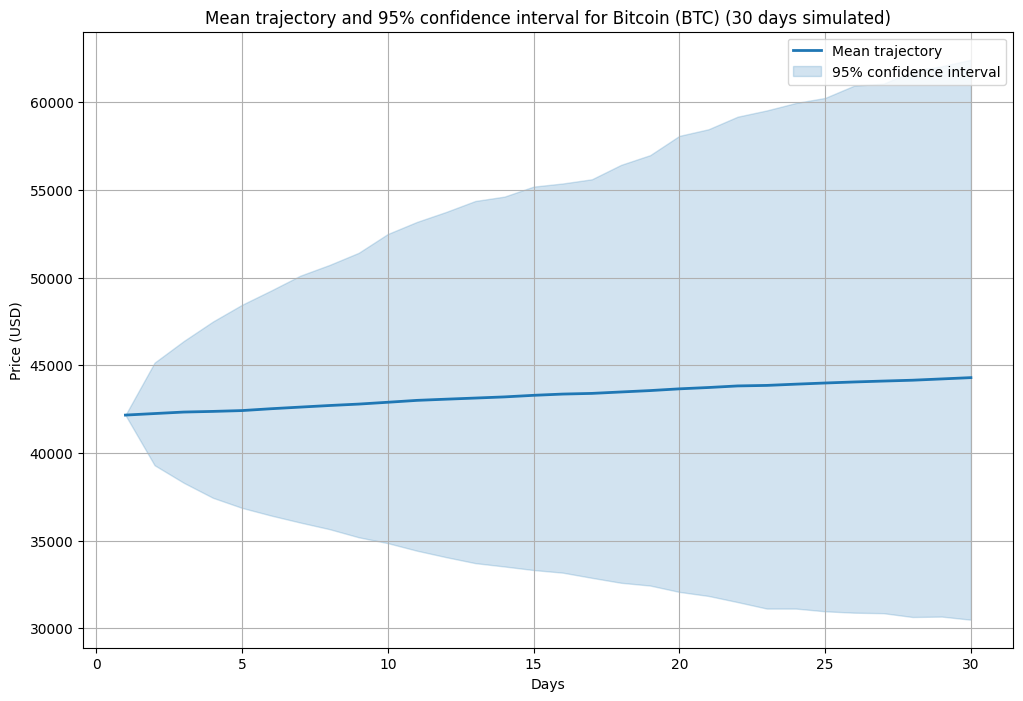

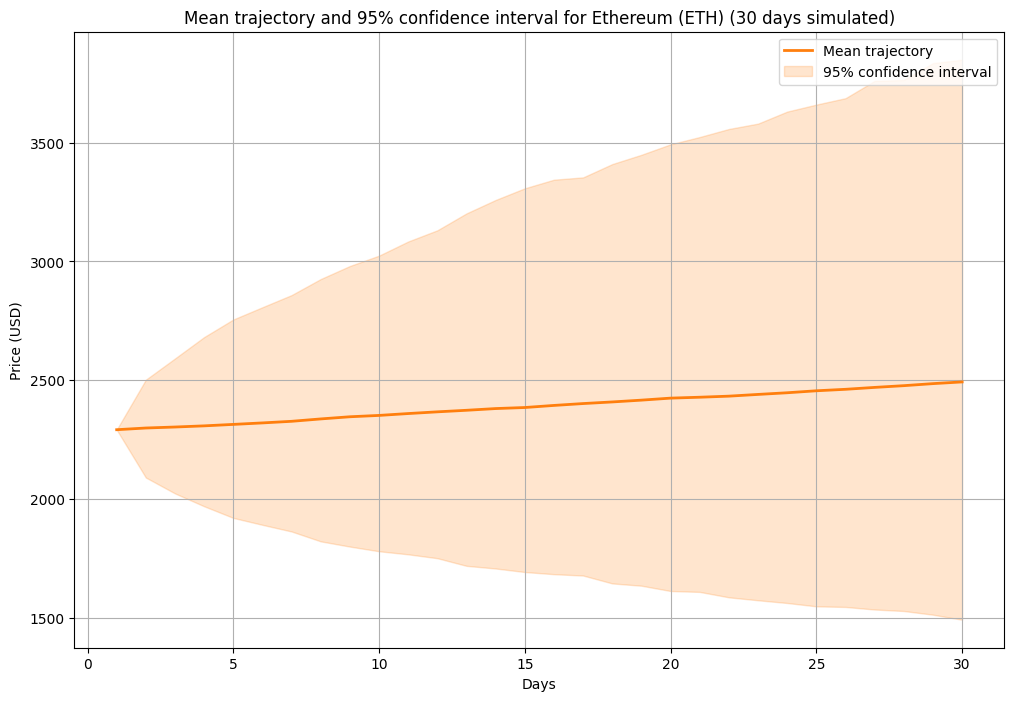

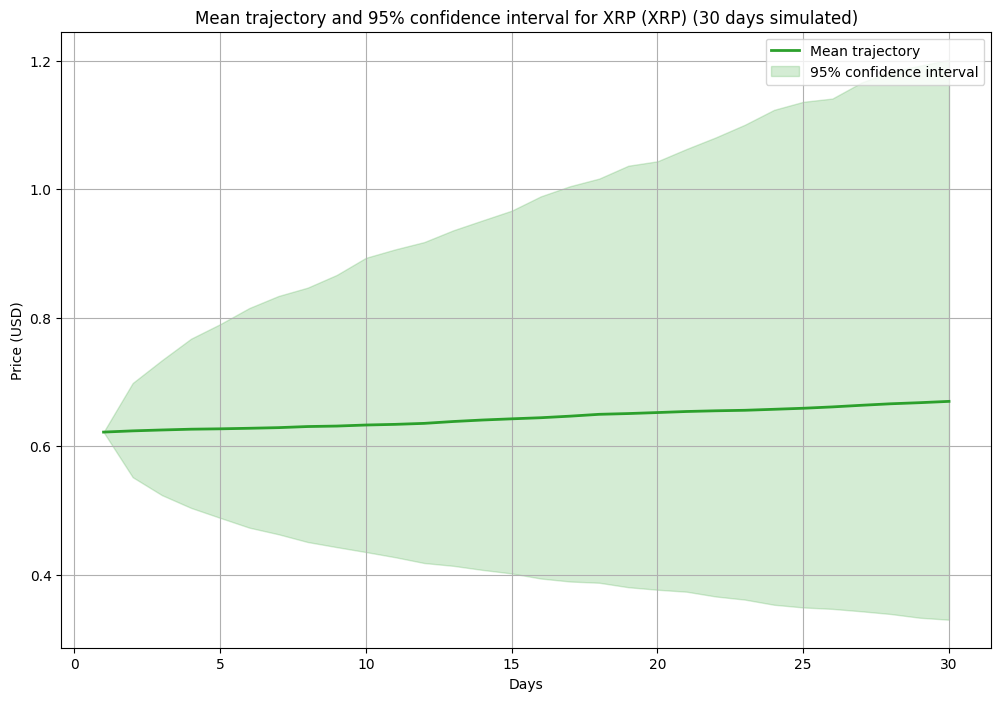

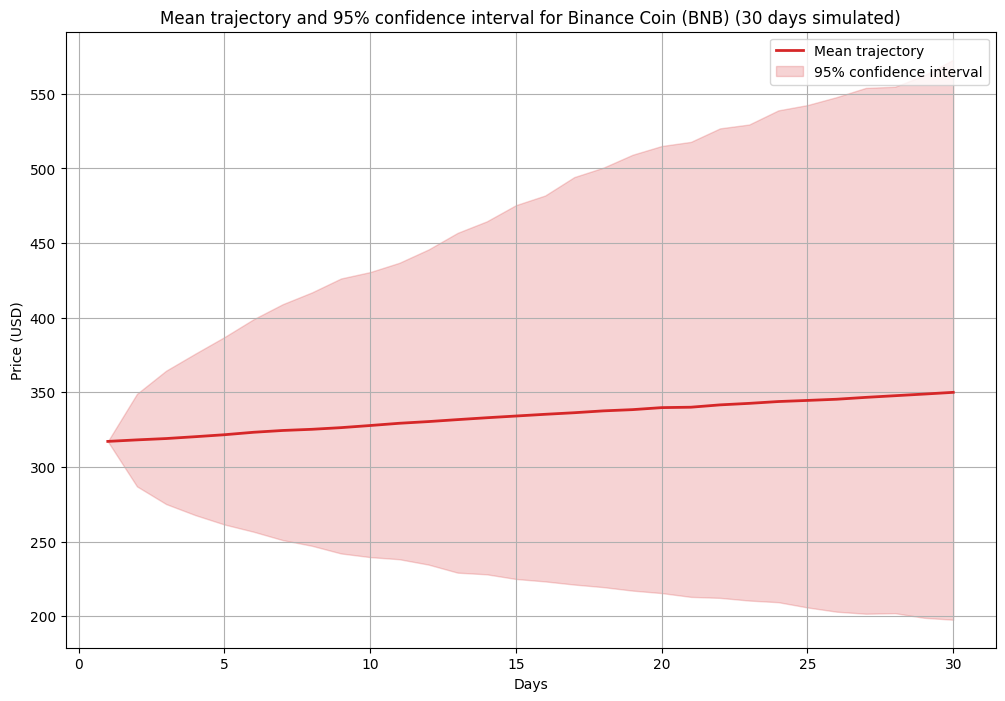

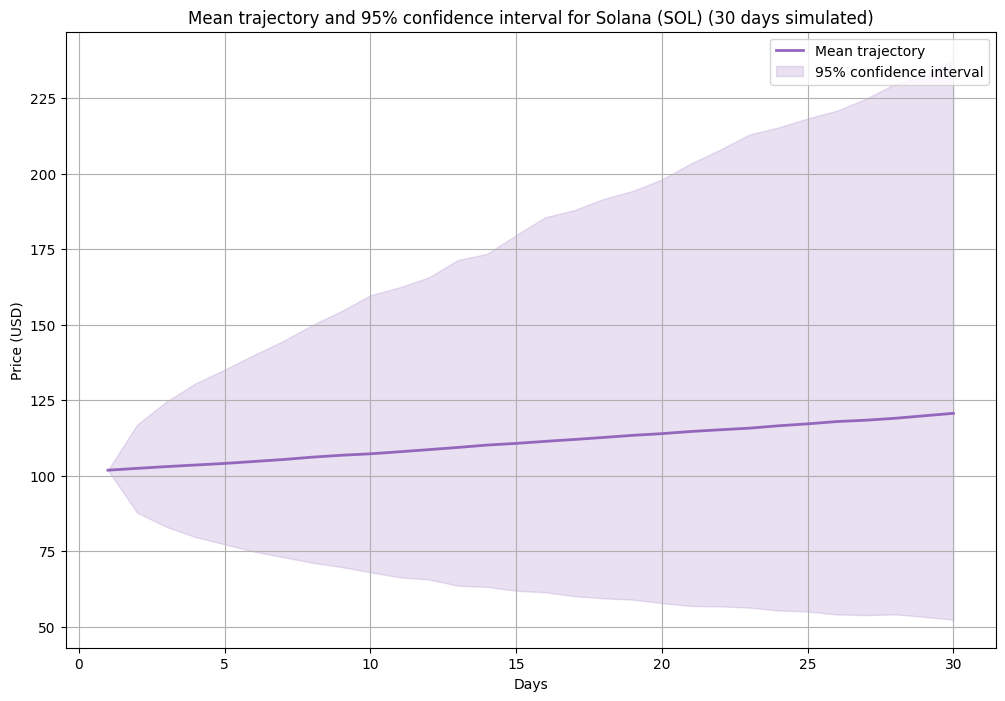

In [94]:
# Example usage with simulated trajectories
traj_mean = {}
for name, trajectories in trajectories_by_crypto.items():
    plot_trajectory_metrics(trajectories, name)
    traj_mean[name] = np.mean(trajectories, axis=0)  # Mean trajectory

In [11]:
traj_mean

{'Bitcoin (BTC)': array([42156.90234375, 42244.05194357, 42321.77749581, 42379.34694754,
        42484.70015548, 42564.96298715, 42666.96510933, 42753.63559874,
        42814.47202248, 42861.99341375, 42915.56555334, 42994.04357938,
        43064.79929427, 43112.19576766, 43182.23646327, 43259.88760442,
        43365.39636002, 43466.70995537, 43565.22655012, 43643.7779275 ,
        43721.76776889, 43773.14626656, 43874.53536581, 43962.72523274,
        44036.99630655, 44139.10248194, 44210.82872083, 44294.12637226,
        44389.64631261, 44471.69448131]),
 'Ethereum (ETH)': array([2292.06542969, 2297.45029467, 2302.44227262, 2308.73318739,
        2313.72133829, 2320.86911748, 2329.79642939, 2337.52991271,
        2341.77407238, 2349.71070872, 2357.7092074 , 2361.78614656,
        2368.5653576 , 2375.3603828 , 2382.74893051, 2389.64679717,
        2395.00432487, 2401.66793528, 2410.31625736, 2416.60556652,
        2423.96326011, 2430.38920502, 2440.02714932, 2447.6929206 ,
        245

In [12]:
# Define the date range for 2024
data_2024_start = "2024-01-01"
data_2024_end = "2024-12-31"

# Create a dictionary to store historical data for 2024
crypto_data_2024 = {}

# Fetch data for each cryptocurrency
for name, ticker in cryptos.items():
    print(f"Fetching data for {name} for the year 2024...")
    crypto_data_2024[name] = yf.download(ticker, start=data_2024_start, end=data_2024_end)

# Confirm data extraction
for name, data in crypto_data_2024.items():
    print(f"\n{name}: Downloaded {len(data)} rows of data for 2024.")

Fetching data for Bitcoin (BTC) for the year 2024...
[*********************100%***********************]  1 of 1 completed
Fetching data for Ethereum (ETH) for the year 2024...
[*********************100%***********************]  1 of 1 completed
Fetching data for XRP (XRP) for the year 2024...
[*********************100%***********************]  1 of 1 completed
Fetching data for Binance Coin (BNB) for the year 2024...
[*********************100%***********************]  1 of 1 completed
Fetching data for Solana (SOL) for the year 2024...
[*********************100%***********************]  1 of 1 completed

Bitcoin (BTC): Downloaded 365 rows of data for 2024.

Ethereum (ETH): Downloaded 365 rows of data for 2024.

XRP (XRP): Downloaded 365 rows of data for 2024.

Binance Coin (BNB): Downloaded 365 rows of data for 2024.

Solana (SOL): Downloaded 365 rows of data for 2024.


In [73]:
# Initialize values
initial_fund = 100000  # Initial USD amount
current_fund = {}  # To store the amount of each cryptocurrency in units
portfolio_weights = {name: 1/len(cryptos) for name in cryptos}  # Equal weights initially
historical_data = {name: crypto_data[name][crypto_data[name].index < "2024-01-01"] for name in cryptos}
portfolio_weights_log = []

# Collect b and sigma values for all cryptocurrencies
b_values = {}
sigma_values = {}

# Calculate initial b and sigma for each cryptocurrency
for name in cryptos:
    b, sigma = calculate_estimators(historical_data[name])
    b_values[name] = b
    sigma_values[name] = sigma

# Calculate portfolio weights
total_b = sum(b_values.values())
total_inv_sigma = sum(1 / sigma for sigma in sigma_values.values())

for name in cryptos:
    b = b_values[name]
    sigma = sigma_values[name]
    weight_component = (b / total_b) * ((1 / sigma) / total_inv_sigma)
    portfolio_weights[name] = weight_component

# Normalize weights
total_weighted_values = sum(portfolio_weights.values())
for name in portfolio_weights:
    portfolio_weights[name] /= total_weighted_values

# Allocate initial funds based on weights and last closing prices before 2024
for name, weight in portfolio_weights.items():
    if not historical_data[name].empty:
        initial_price = historical_data[name]['Close'].iloc[-1]  # Last price before 2024
        if initial_price > 0:
            current_fund[name] = initial_fund * weight / initial_price
        else:
            raise ValueError(f"Invalid initial price for {name}: {initial_price}")
    else:
        raise ValueError(f"Missing historical data for {name} before 2024.")

# Debugging: Log initial fund allocation
portfolio_weights_log.append(portfolio_weights)
print("\nInitial Fund Allocation:")
for name in cryptos:
    print(f"{name}: {current_fund.get(name, 0):.6f} units of {name}")

# Calculate initial total portfolio value in USD
current_fund_usd = sum(
    current_fund[name] * historical_data[name]['Close'].iloc[-1]
    for name in cryptos
)
print(f"Initial portfolio value: {current_fund_usd:.2f} USD")



Initial Fund Allocation:
Bitcoin (BTC): 0.400955 units of Bitcoin (BTC)
Ethereum (ETH): 9.317816 units of Ethereum (ETH)
XRP (XRP): 21576.588148 units of XRP (XRP)
Binance Coin (BNB): 68.037621 units of Binance Coin (BNB)
Solana (SOL): 262.589419 units of Solana (SOL)
Initial portfolio value: 100000.00 USD


In [74]:
# Function to rebalance the portfolio
def rebalance_portfolio(historical_data, current_fund, crypto_data, month, cryptos=cryptos):
    new_weights = {}
    total_weighted_values = 0

    # Collect b and sigma values for all cryptocurrencies
    b_values = {}
    sigma_values = {}

    for name in cryptos:
        # Extract monthly data
        monthly_data = crypto_data[name][crypto_data[name].index.month == month]
        if monthly_data.empty:
            raise ValueError(f"Missing data for {name} in month {month}. Check the dataset.")

        # Append monthly data to historical data
        historical_data[name] = pd.concat([historical_data[name], monthly_data])

        # Calculate estimators
        b, sigma = calculate_estimators(historical_data[name])
        b_values[name] = b
        sigma_values[name] = sigma

    # Debugging: Log b and sigma values
    print(f"Month {month}: b_values = {b_values}, sigma_values = {sigma_values}")

    # Calculate portfolio weights
    total_b = sum(b_values.values())
    total_inv_sigma = sum(1 / sigma for sigma in sigma_values.values())

    for name in cryptos:
        b = b_values[name]
        sigma = sigma_values[name]
        weight_component = (b / total_b) * ((1 / sigma) / total_inv_sigma)
        new_weights[name] = weight_component
        total_weighted_values += weight_component

    # Normalize weights
    for name in new_weights:
        new_weights[name] /= total_weighted_values

    # Debugging: Log new weights
    print(f"Month {month}: new_weights = {new_weights}")

    # Reallocate funds
    current_fund_usd = sum(
        current_fund[name] * historical_data[name]['Close'].iloc[-1]
        for name in cryptos
    )

    if current_fund_usd == 0 or np.isnan(current_fund_usd):
        raise ValueError(f"Invalid fund value after rebalancing for month {month}. Check calculations.")

    for name, weight in new_weights.items():
        # portfolio_weights[name] = weight
        current_fund[name] = current_fund_usd * weight / historical_data[name]['Close'].iloc[-1]

    return current_fund, new_weights, current_fund_usd, historical_data


In [75]:
def calculate_var_cvar(returns, confidence_level=0.95):
    """
    Calculate the Value at Risk (VaR) and Conditional Value at Risk (CVaR) for a given confidence level.

    Arguments:
    - returns: Array or list of returns (e.g., portfolio returns).
    - confidence_level: Confidence level for the calculation (default: 95%).

    Returns:
    - var: Value at Risk at the specified confidence level.
    - cvar: Conditional Value at Risk at the specified confidence level.
    """
    # Sort returns in ascending order
    sorted_returns = np.sort(returns)
    
    # Calculate VaR as the percentile
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[var_index]
    
    # Calculate CVaR as the mean of values below VaR
    cvar_slice = sorted_returns[:var_index]
    if len(cvar_slice) > 0:
        cvar = np.mean(cvar_slice)
    else:
        cvar = np.nan  # Gracefully handle empty slices

    return var, cvar


In [76]:
# Function to calculate correlation index
def calculate_correlation(portfolio_value_log, btc_value_log):
    """
    Calculate the correlation index between portfolio and Bitcoin values.
    
    Arguments:
    - portfolio_value_log: List of portfolio values over time.
    - btc_value_log: List of Bitcoin values over the same period.
    
    Returns:
    - correlation: Correlation coefficient between the two series.
    """
    return np.corrcoef(portfolio_value_log, btc_value_log)[0, 1]


In [77]:
# Simulate monthly rebalancing
btc_value_log = []  # Track Bitcoin values for correlation calculation
portfolio_returns = []  # Track monthly portfolio returns
portfolio_value_log = [] # Track Portfolio values for correlation calculation

for month in range(1, 13):
    print(f"Processing month {month}...")
    previous_fund_usd = current_fund_usd if month > 1 else initial_fund

    # Rebalance portfolio
    current_fund, portfolio_weights, current_fund_usd, historical_data = rebalance_portfolio(
        historical_data, current_fund, crypto_data_2024, month, cryptos
    )
    portfolio_value_log.append(current_fund_usd)
    btc_value_log.append(crypto_data_2024["Bitcoin (BTC)"]["Close"].iloc[month - 1])
    portfolio_weights_log.append(portfolio_weights)
    
    # Calculate monthly return
    if previous_fund_usd > 0:
        monthly_return = (current_fund_usd - previous_fund_usd) / previous_fund_usd
        portfolio_returns.append(monthly_return)

Processing month 1...
Month 1: b_values = {'Bitcoin (BTC)': 0.001809056637965349, 'Ethereum (ETH)': 0.002965681159872235, 'XRP (XRP)': 0.0023256157593442555, 'Binance Coin (BNB)': 0.0033080872484053635, 'Solana (SOL)': 0.005931687901292436}, sigma_values = {'Bitcoin (BTC)': 0.03468996586855218, 'Ethereum (ETH)': 0.04518922143962045, 'XRP (XRP)': 0.05964398372474531, 'Binance Coin (BNB)': 0.05033546671763049, 'Solana (SOL)': 0.07251924652866493}
Month 1: new_weights = {'Bitcoin (BTC)': 0.17138331894361714, 'Ethereum (ETH)': 0.21567999102622387, 'XRP (XRP)': 0.12814202307108535, 'Binance Coin (BNB)': 0.21598476237398437, 'Solana (SOL)': 0.26880990458508924}
Processing month 2...
Month 2: b_values = {'Bitcoin (BTC)': 0.0020202657155197804, 'Ethereum (ETH)': 0.003165472944867234, 'XRP (XRP)': 0.0023859102834114837, 'Binance Coin (BNB)': 0.003439506784615814, 'Solana (SOL)': 0.006004521238051435}, sigma_values = {'Bitcoin (BTC)': 0.034555308887605794, 'Ethereum (ETH)': 0.04486407593035769, 

In [78]:
# Final Comparison
btc_2024_start = crypto_data_2024["Bitcoin (BTC)"]["Close"].iloc[0]
btc_2025_start = crypto_data_2024["Bitcoin (BTC)"]["Close"].iloc[-1]
btc_profit = initial_fund * btc_2025_start / btc_2024_start - initial_fund

portfolio_profit = portfolio_value_log[-1] - initial_fund

# Ensure btc_value_log matches portfolio_value_log frequency (monthly)
crypto_data_2024["Bitcoin (BTC)"].index = pd.to_datetime(crypto_data_2024["Bitcoin (BTC)"].index)
btc_value_log_monthly = crypto_data_2024["Bitcoin (BTC)"]["Close"].resample('M').last().values

# Check if lengths match after alignment
if len(btc_value_log_monthly) != len(portfolio_value_log):
    raise ValueError(
        f"Length mismatch: portfolio_value_log has {len(portfolio_value_log)} values, "
        f"but btc_value_log has {len(btc_value_log_monthly)} values."
    )

# Calculate Portfolio Returns
portfolio_returns = np.diff(portfolio_value_log) / portfolio_value_log[:-1]

# Calculate VaR, CVaR, and correlation
var, cvar = calculate_var_cvar(portfolio_returns)
correlation = calculate_correlation(portfolio_value_log, btc_value_log_monthly)

# Print results
print("\nPerformance Comparison:")
print(f"Portfolio Profit (USD): {portfolio_profit:.2f}")
print(f"Bitcoin Profit (USD): {btc_profit:.2f}")
print(f"Difference (USD): {abs(portfolio_profit - btc_profit):.2f}")
print("\nRisk Analysis:")
print(f"Portfolio VaR (95%): {var:.4f}")
print(f"Portfolio CVaR (95%): {cvar:.4f}")
print(f"Correlation with Bitcoin: {correlation:.4f}")


Performance Comparison:
Portfolio Profit (USD): 131695.80
Bitcoin Profit (USD): 109755.05
Difference (USD): 21940.75

Risk Analysis:
Portfolio VaR (95%): -0.1979
Portfolio CVaR (95%): nan
Correlation with Bitcoin: 0.9842


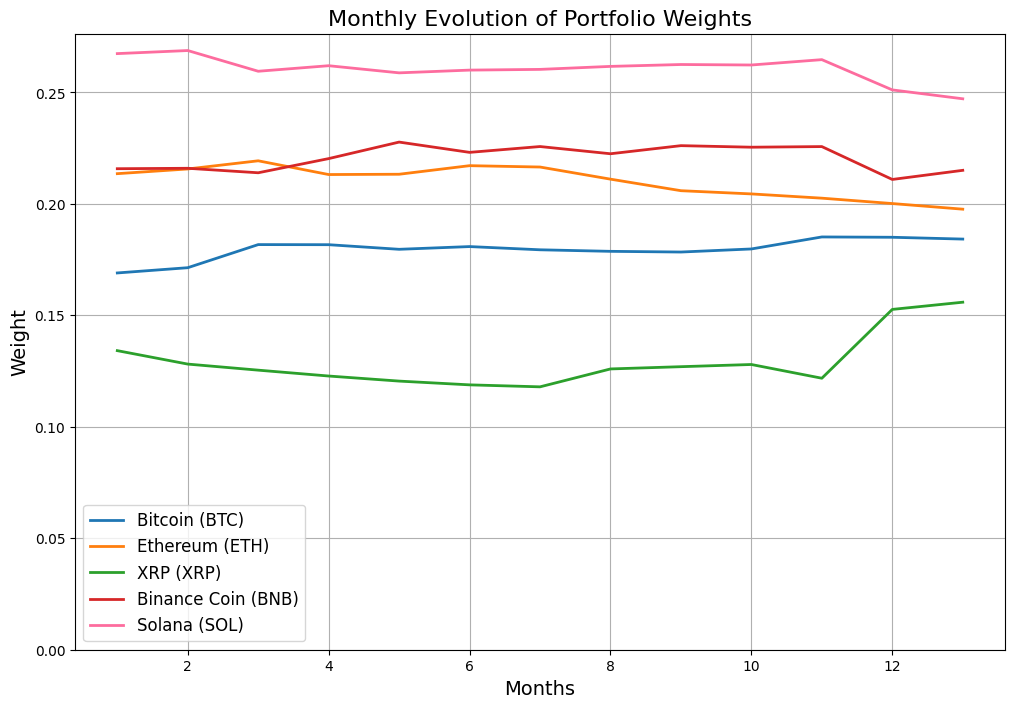

In [95]:
# Function to plot the evolution of portfolio weights using designated crypto colors
def plot_portfolio_weights_evolution(portfolio_weights_log=portfolio_weights_log, cryptos=list(cryptos.keys()), crypto_colors=crypto_colors):
    """
    Plot the monthly evolution of portfolio weights for each cryptocurrency using specified colors.
    
    Arguments:
    - portfolio_weights_log: List of dictionaries containing weights for each cryptocurrency.
    - cryptos: List of cryptocurrency names.
    - crypto_colors: Dictionary mapping cryptocurrency names to their designated colors.
    """
    # Prepare data for plotting
    months = np.arange(1, len(portfolio_weights_log) + 1)
    weights_df = pd.DataFrame(portfolio_weights_log)

    plt.figure(figsize=(12, 8))
    for crypto in cryptos:
        plt.plot(
            months, 
            weights_df[crypto], 
            label=crypto, 
            color=crypto_colors.get(crypto, "#000000"),  # Default to black if color is missing
            linewidth=2
        )

    plt.title("Monthly Evolution of Portfolio Weights", fontsize=16)
    plt.xlabel("Months", fontsize=14)
    plt.ylabel("Weight", fontsize=14)
    plt.ylim(bottom=0)  # Ensure the y-axis starts at 0
    plt.legend(loc="best", fontsize=12)
    plt.grid()
    plt.show()

# Example usage
plot_portfolio_weights_evolution(portfolio_weights_log, list(cryptos.keys()), crypto_colors)


In [100]:
portfolio_weights_log

[{'Bitcoin (BTC)': 0.16903010251832248,
  'Ethereum (ETH)': 0.21357042807891066,
  'XRP (XRP)': 0.1341727174347923,
  'Binance Coin (BNB)': 0.21579233491293942,
  'Solana (SOL)': 0.26743441705503507},
 {'Bitcoin (BTC)': 0.17138331894361714,
  'Ethereum (ETH)': 0.21567999102622387,
  'XRP (XRP)': 0.12814202307108535,
  'Binance Coin (BNB)': 0.21598476237398437,
  'Solana (SOL)': 0.26880990458508924},
 {'Bitcoin (BTC)': 0.18175034233270512,
  'Ethereum (ETH)': 0.2193417995292467,
  'XRP (XRP)': 0.1254212073793415,
  'Binance Coin (BNB)': 0.21397247621153714,
  'Solana (SOL)': 0.25951417454716946},
 {'Bitcoin (BTC)': 0.1817048401226352,
  'Ethereum (ETH)': 0.21317757593174805,
  'XRP (XRP)': 0.12278663623872005,
  'Binance Coin (BNB)': 0.22032909434091574,
  'Solana (SOL)': 0.2620018533659809},
 {'Bitcoin (BTC)': 0.17963909002853157,
  'Ethereum (ETH)': 0.21330949363558335,
  'XRP (XRP)': 0.12051259576343004,
  'Binance Coin (BNB)': 0.2277404121093988,
  'Solana (SOL)': 0.2587984084630562

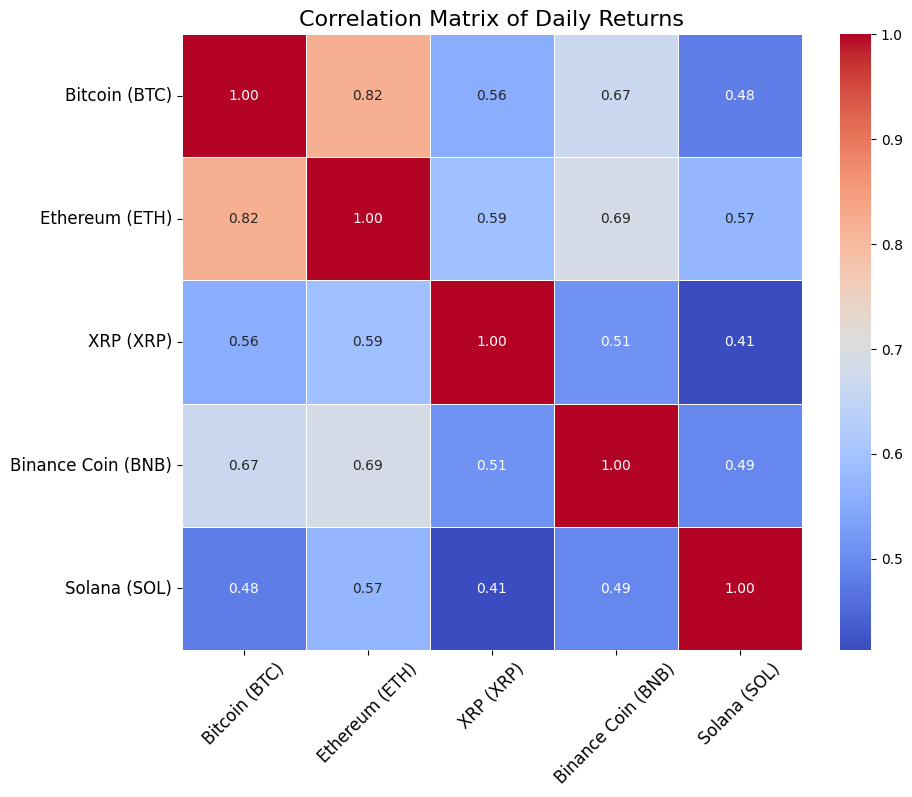


Correlation Matrix:
                    Bitcoin (BTC)  Ethereum (ETH)  XRP (XRP)  \
Bitcoin (BTC)            1.000000        0.820817   0.555227   
Ethereum (ETH)           0.820817        1.000000   0.591882   
XRP (XRP)                0.555227        0.591882   1.000000   
Binance Coin (BNB)       0.665749        0.685809   0.511358   
Solana (SOL)             0.480699        0.571961   0.412809   

                    Binance Coin (BNB)  Solana (SOL)  
Bitcoin (BTC)                 0.665749      0.480699  
Ethereum (ETH)                0.685809      0.571961  
XRP (XRP)                     0.511358      0.412809  
Binance Coin (BNB)            1.000000      0.494436  
Solana (SOL)                  0.494436      1.000000  


In [96]:
# Function to calculate and plot the correlation matrix
def plot_correlation_matrix(crypto_data, cryptos=list(cryptos.keys())):
    """
    Calculate and display the correlation matrix as a heatmap for daily returns of selected cryptocurrencies.
    
    Arguments:
    - crypto_data: Dictionary containing DataFrames of historical data for each cryptocurrency.
    - cryptos: List of cryptocurrency names.
    """
    daily_returns = {}

    # Compute daily returns for each cryptocurrency
    for name in cryptos:
        prices = crypto_data[name]["Close"]
        daily_returns[name] = prices.pct_change().dropna()

    # Combine returns into a single DataFrame
    returns_df = pd.DataFrame(daily_returns)

    # Calculate correlation matrix
    correlation_matrix = returns_df.corr()

    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
        cbar=True,
        xticklabels=correlation_matrix.columns,
        yticklabels=correlation_matrix.columns
    )
    plt.title("Correlation Matrix of Daily Returns", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(rotation=0, fontsize=12)
    plt.show()
    
    return correlation_matrix

# Example usage
# Calculate and display correlation matrix
correlation_matrix = plot_correlation_matrix(crypto_data, list(cryptos.keys()))
print("\nCorrelation Matrix:")
print(correlation_matrix)

    Month  Portfolio Value (USD)  Bitcoin Value (USD)
0       1           95113.099265         42582.605469
1       2          128132.331458         61198.382812
2       3          170353.209115         71333.648438
3       4          136632.254037         60636.855469
4       5          158805.462710         67491.414062
5       6          146740.084968         62678.292969
6       7          157391.892638         64619.250000
7       8          134340.183880         58969.898438
8       9          144911.662061         63329.500000
9      10          148093.968264         70215.187500
10     11          244031.057240         96449.054688
11     12          231695.799288         92643.210938


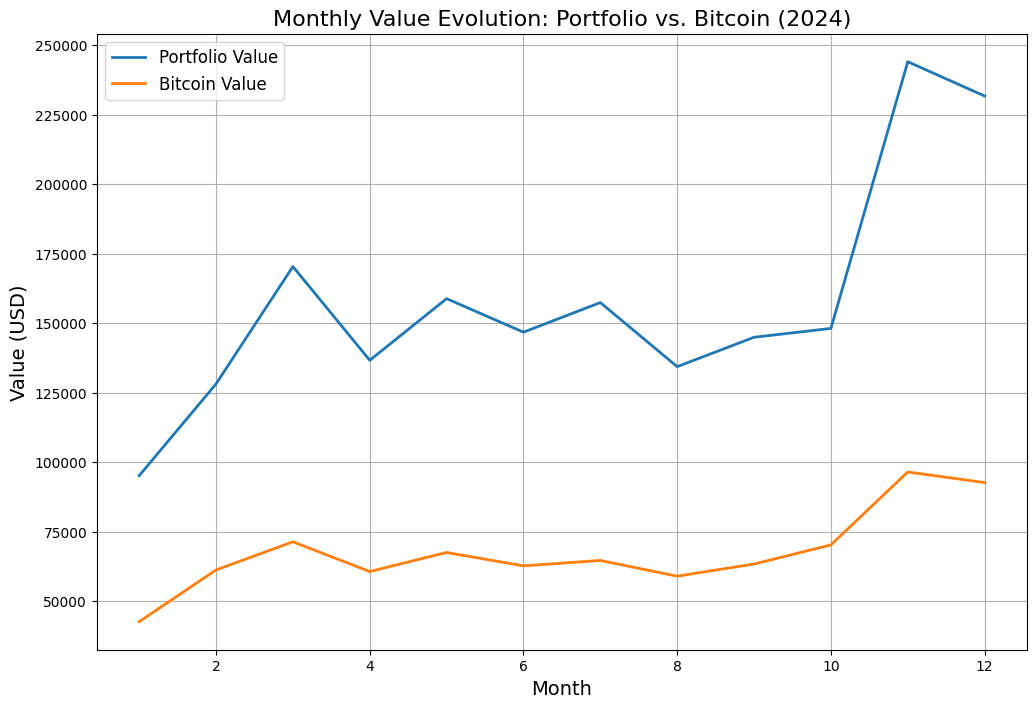

In [97]:
# Prepare the monthly breakdown of portfolio and Bitcoin values
def calculate_monthly_trajectories(portfolio_value_log, btc_value_log, months=12):
    """
    Organize monthly portfolio and Bitcoin value trajectories for detailed comparison.

    Arguments:
    - portfolio_value_log: List of monthly portfolio values.
    - btc_value_log: List of monthly Bitcoin values.
    - months: Total number of months.

    Returns:
    - monthly_trajectories: A DataFrame containing monthly values for the portfolio and Bitcoin.
    """
    data = {
        "Month": np.arange(1, months + 1),
        "Portfolio Value (USD)": portfolio_value_log,
        "Bitcoin Value (USD)": btc_value_log,
    }
    return pd.DataFrame(data)


# Call the function and create a DataFrame
monthly_trajectories_df = calculate_monthly_trajectories(portfolio_value_log, btc_value_log_monthly)

# Display the monthly trajectories
print(monthly_trajectories_df)

# Plot monthly trajectories for both portfolio and Bitcoin
plt.figure(figsize=(12, 8))
plt.plot(monthly_trajectories_df["Month"], monthly_trajectories_df["Portfolio Value (USD)"], label="Portfolio Value", color="#1f77b4", linewidth=2)
plt.plot(monthly_trajectories_df["Month"], monthly_trajectories_df["Bitcoin Value (USD)"], label="Bitcoin Value", color="#ff7f0e", linewidth=2)
plt.title("Monthly Value Evolution: Portfolio vs. Bitcoin (2024)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Value (USD)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.show()


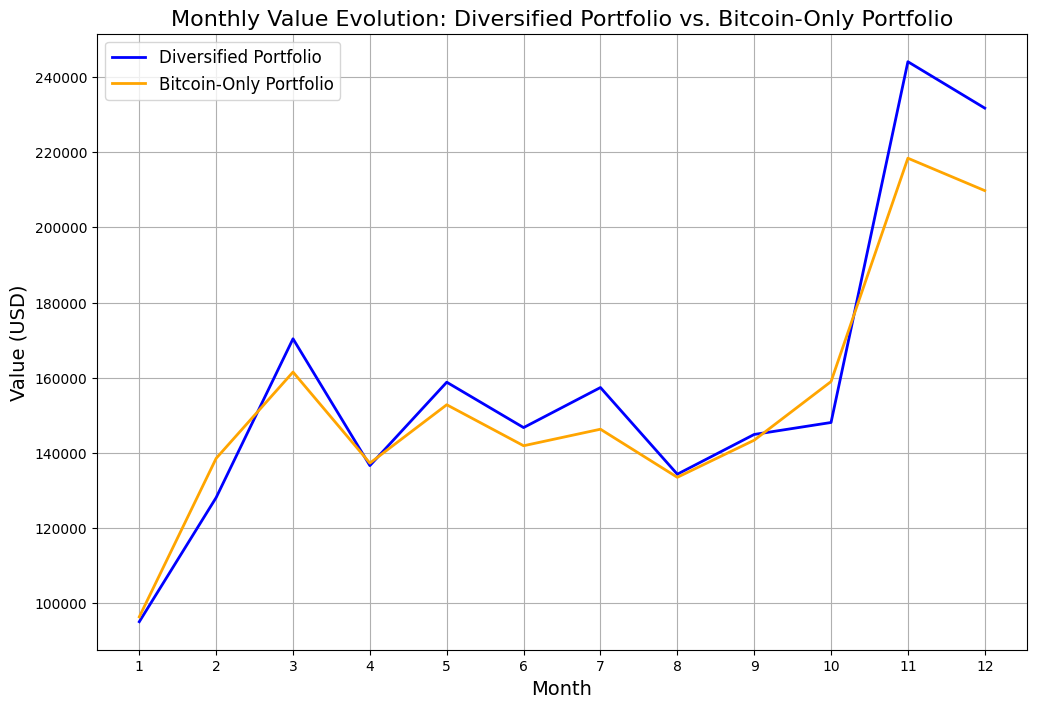

    Month  Portfolio Value (USD)  Bitcoin-Only Value (USD)
0       1           95113.099265              96411.993911
1       2          128132.331458             138560.288788
2       3          170353.209115             161507.714315
3       4          136632.254037             137288.925276
4       5          158805.462710             152808.446783
5       6          146740.084968             141910.978287
6       7          157391.892638             146305.531777
7       8          134340.183880             133514.739799
8       9          144911.662061             143385.387089
9      10          148093.968264             158975.388077
10     11          244031.057240             218371.928418
11     12          231695.799288             209755.053513


In [99]:
# Assuming 'portfolio_value_log' and 'crypto_data_2024' are already defined
# Calculate Bitcoin-only portfolio evolution
initial_fund = 100000  # Initial USD amount
btc_start_price = crypto_data_2024["Bitcoin (BTC)"]["Close"].iloc[0]  # Bitcoin price on Jan 1, 2024
btc_units = initial_fund / btc_start_price  # Units of Bitcoin bought at the start of the year

btc_value_log = crypto_data_2024["Bitcoin (BTC)"]["Close"].resample('M').last().values * btc_units

# Generate a monthly comparison dataframe
months = np.arange(1, len(portfolio_value_log) + 1)
comparison_df = pd.DataFrame({
    "Month": months,
    "Portfolio Value (USD)": portfolio_value_log,
    "Bitcoin-Only Value (USD)": btc_value_log
})

# Plot the comparison
plt.figure(figsize=(12, 8))
plt.plot(comparison_df["Month"], comparison_df["Portfolio Value (USD)"], label="Diversified Portfolio", linewidth=2, color="blue")
plt.plot(comparison_df["Month"], comparison_df["Bitcoin-Only Value (USD)"], label="Bitcoin-Only Portfolio", linewidth=2, color="orange")

# Add labels, title, and legend
plt.title("Monthly Value Evolution: Diversified Portfolio vs. Bitcoin-Only Portfolio", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Value (USD)", fontsize=14)
plt.xticks(ticks=comparison_df["Month"])
plt.legend(loc="best", fontsize=12)
plt.grid()
plt.show()

print(comparison_df)
